### Exploring Evictions in San Francisco ###

In [1]:
###Load in the necessary packages###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
###Read in data csv file and choose which columns we want to be included###
evict = pd.read_csv("data/Eviction_Notices.csv", engine='python', on_bad_lines='skip')
bad_reasons = evict[['Eviction ID', 'Address','File Date', 'Non Payment', 'Nuisance', 'Illegal Use', 'Unapproved Subtenant', 'Demolition', 'Ellis Act WithDrawal', 'Late Payments', 'Failure to Sign Renewal', 'Neighborhoods - Analysis Boundaries']].dropna()

sample = bad_reasons.sample(5000).rename({'Neighborhoods - Analysis Boundaries': 'Neighborhoods'}, axis=1)
sample.head(20)

,Eviction ID,Address,File Date,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal,Neighborhoods
3881,M150489,200 Block Of Pixley Street,02/27/2015,False,False,False,False,False,True,False,False,Marina
28499,M051796,500 Block Of Ellsworth Street,09/27/2005,False,False,False,False,False,False,False,False,Bernal Heights
95679,M193010,900 Block Of Cabrillo Street,11/15/2019,False,False,False,False,False,False,False,False,Inner Richmond
46387,M163430,3500 Block Of 22nd Street,10/28/2016,False,False,False,False,False,False,False,False,Noe Valley
45403,M130091,200 Block Of Green Street,01/16/2013,False,False,True,False,False,False,False,False,North Beach
107369,M080137,300 Block Of Eddy Street,01/31/2008,False,True,False,False,False,False,False,False,Tenderloin
31546,M040095,700 Block Of 05th Avenue,01/16/2004,False,False,False,False,False,False,False,False,Inner Richmond
78235,M032386,100 Block Of Cole Street,07/30/2003,False,False,False,False,False,False,False,False,Lone Mountain/USF
46303,M170096,600 Block Of Taylor Street,01/23/2017,False,False,False,False,False,False,False,False,Nob Hill
26690,M050676,500 Block Of Ellis Street,04/21/2005,False,True,False,False,False,False,False,False,Tenderloin


In [3]:
###find frequency of neighborhoods###

neighborhood_counts = sample[['Neighborhoods']].value_counts().reset_index(name='counts')
neighborhood_counts

,Neighborhoods,counts
0,Mission,555
1,Tenderloin,336
2,Sunset/Parkside,303
3,Outer Richmond,240
4,Lakeshore,229
5,Castro/Upper Market,212
6,South of Market,198
7,Hayes Valley,197
8,Nob Hill,192
9,Marina,157


In [4]:
neighborhood_counts.describe()

,counts
count,40.000000
mean,125.000000
std,107.796104
min,2.000000
25%,49.250000
50%,115.500000
75%,156.250000
max,555.000000


<BarContainer object of 40 artists>

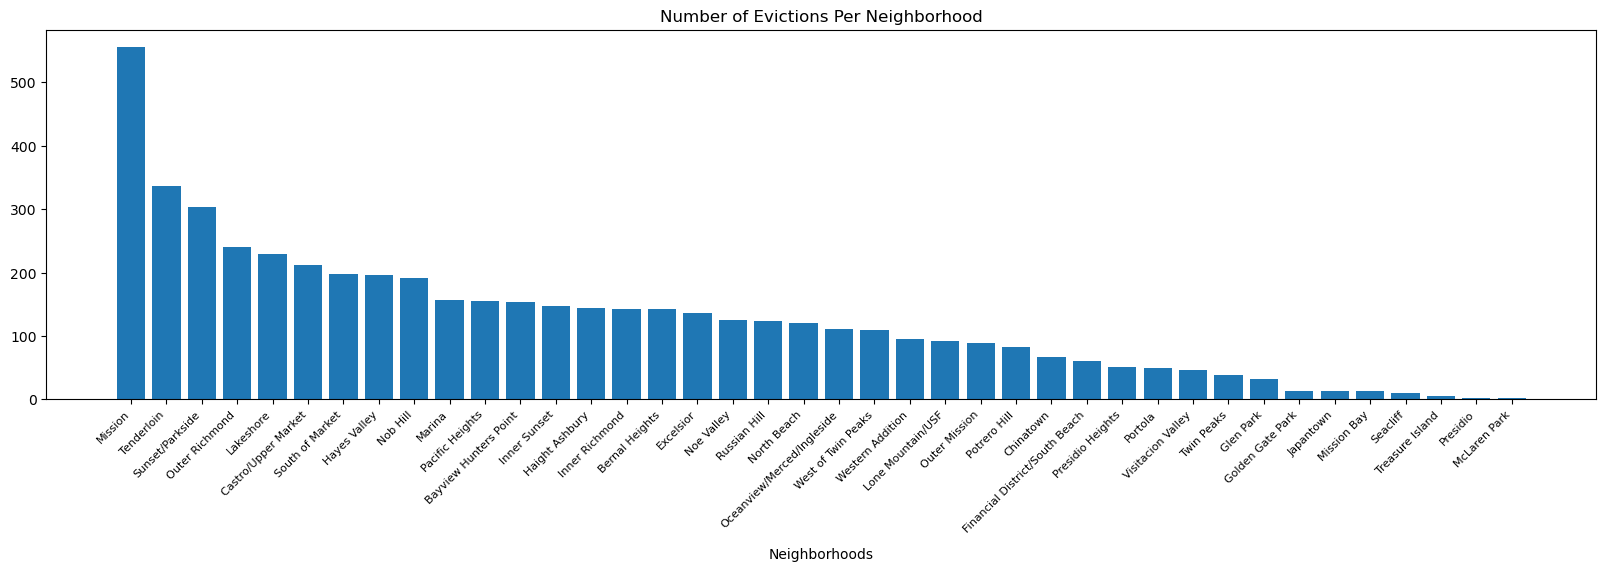

In [5]:
neighs = list(neighborhood_counts["Neighborhoods"])
counts = list(neighborhood_counts["counts"])
fig, ax = plt.subplots()
fig.set_figwidth(20)
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
plt.xlabel("Neighborhoods", labelpad = 10)
plt.title("Number of Evictions Per Neighborhood")
plt.bar(neighs, counts)

In [6]:
###load dataframe with only the reasons###
reasons = sample.iloc[:, 3:11]
reasons

,Non Payment,Nuisance,Illegal Use,Unapproved Subtenant,Demolition,Ellis Act WithDrawal,Late Payments,Failure to Sign Renewal
3881,False,False,False,False,False,True,False,False
28499,False,False,False,False,False,False,False,False
95679,False,False,False,False,False,False,False,False
46387,False,False,False,False,False,False,False,False
45403,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
53219,False,False,False,False,False,False,False,False
19832,False,False,False,False,False,False,False,False
80029,False,False,False,False,False,False,False,False
34553,False,False,False,False,False,False,False,False


In [7]:
###finding number of occurrences per reasons###
for col in reasons.columns:
    print(sample[[col]].value_counts().reset_index(name='counts'))

   Non Payment  counts
0        False    4671
1         True     329
   Nuisance  counts
0     False    4053
1      True     947
   Illegal Use  counts
0        False    4893
1         True     107
   Unapproved Subtenant  counts
0                 False    4918
1                  True      82
   Demolition  counts
0       False    4857
1        True     143
   Ellis Act WithDrawal  counts
0                 False    4540
1                  True     460
   Late Payments  counts
0          False    4829
1           True     171
   Failure to Sign Renewal  counts
0                    False    4985
1                     True      15


In [8]:
###another method to find number of true and false occurrences per reason###
columnNames = reasons.columns
trues_oc = {}

for i in reasons.columns:
    trues_oc[i] = reasons[i].sum()

print(trues_oc)

argh = pd.DataFrame(trues_oc, ['True'], columnNames).reset_index()
print(argh)

{'Non Payment': 329, 'Nuisance': 947, 'Illegal Use': 107, 'Unapproved Subtenant': 82, 'Demolition': 143, 'Ellis Act WithDrawal': 460, 'Late Payments': 171, 'Failure to Sign Renewal': 15}
  index  Non Payment  Nuisance  Illegal Use  Unapproved Subtenant  Demolition  \
0  True          329       947          107                    82         143   

   Ellis Act WithDrawal  Late Payments  Failure to Sign Renewal  
0                   460            171                       15  


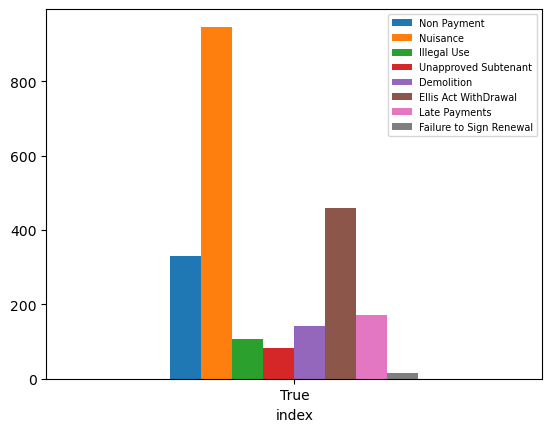

In [9]:
reasons_list = [column for column in argh.columns]
reasons_bar = argh.plot(x='index', y=reasons_list[1:], kind='bar', rot=0)
plt.legend(loc='best', fontsize='7')